<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/Opt_T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Implementation

In [4]:
#steepest descent.
def Steepest_descent(alpha,x_0,f,grad_f,tol_grad=10**(-6),max_iter=10**5,pr="False"):
    x_1=x_0-alpha*np.array(grad_f(x_0))#First iteration
    if(pr=='True'):
        print("Initial approximation: ", x_0)
        F=[f(x_0)]
        G=[np.linalg.norm(grad_f(x_0))]
    x_0=x_1
    k=1
    norm_grad=np.linalg.norm(grad_f(x_1))
    #Cycle
    while(norm_grad>tol_grad and k<max_iter):#stop criteria
        k+=1
        x_1=x_0-alpha*np.array(grad_f(x_0))
        x_0=x_1
        norm_grad=np.linalg.norm(grad_f(x_1))
        if(pr=='True'):
            F.append(f(x_0))
            G.append(np.linalg.norm(grad_f(x_0)))
    if(k==max_iter):
        print("There wasnt convergence after "+str(max_iter)+" iterations.\nLast iteration: "+str(x_1))
    else:
        if(pr=='True'):
            if(len(F)>1000):
                L=200
            else:
                L=0
            plt.plot(range(L+1,len(F)),F[L:-1])#Posterior convergence
            #Ploteo los ultimos para ver qué forma tiene la curva en las ultimas iteraciones, pues inicia decreciendo muy rápido.
            plt.title("k vs. F(X_k)")   
            plt.show()         
            plt.plot(range(L+1,len(G)),G[L:-1])
            plt.title("k vs. ||g(X_k)||")   
            plt.show()         
        print("iterations: ",k)
        return (x_1)

In [ ]:
#Exercise 2. Rosembrok's function.---------------------------------------------

In [9]:
def Rosembrok(X):#X es un vector.
    suma=0
    for i in range(len(X)-1):#Se puede otpimizar.
        suma+=100*((X[i+1]-X[i]**2)**2)+(1-X[i])**2
    return (suma)
def Rosembrok_grad(X):
    D=[]
    D.append(-400*(X[0]*(X[1]-X[0]**2))-2*(1-X[0]))
    for i in range(1,len(X)-1):
        D.append(-400*(X[i]*(X[i+1]-X[i]**2))+200*(X[i]-X[i-1]**2)-2*(1-X[i]))
    D.append(200*(X[-1]-X[-2]**2))
    return D
def Rosembrok_Hessian(X):
    M=[]
    #Renglon 1
    D=np.zeros(len(X))
    D[0]=(-400*(X[1]-X[0]**2)+800*(X[0]**2)+2)
    D[1]=-400*(X[1])
    M.append(D)
    #Renglon 2<i<n
    for i in range(1,len(X)-1):
        D=np.zeros(len(X))
        D[i]=(-400*(X[i+1]-X[i]**2)+800*(X[i]**2)+202)
        D[i-1]=-400*X[i-1]
        D[i+1]=-400*X[i]
        M.append(D)
    #Renglon n
    D=np.zeros(len(X))
    D[-2]=-400*X[-2]
    D[-1]=200
    M.append(D)
    return M

Initial approximation:  [-1.2, 1]


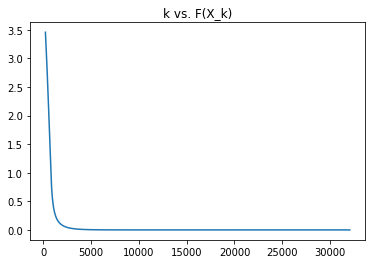

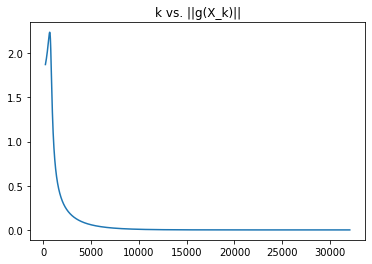

iterations:  32076
local minimum approximation:  [0.99999888 0.99999776]
f-value:  1.2517236788075983e-12

X_0 random
Initial approximation:  [1.88202617 1.2000786 ]


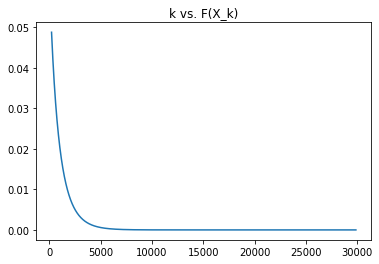

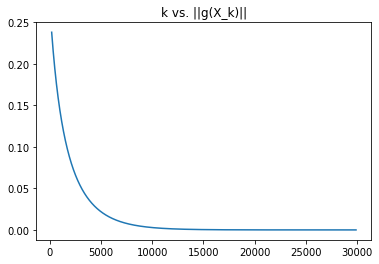

iterations:  29892
local minimum approximation:  [0.99999888 0.99999776]
f-value:  1.2512253337646685e-12


In [15]:
#Grafica
#Case n=2----------------------------------
#Given X_0---------------------------------------
loc_min=Steepest_descent(alpha=0.001,x_0=[-1.2,1],f=Rosembrok,grad_f=Rosembrok_grad,pr='True')
print("local minimum approximation: ",loc_min)
print("f-value: ",Rosembrok(loc_min))
#Random X_0---------------------------------------
np.random.seed(0)
x_0=np.random.normal(1,0.5,size=2)#Close to the minimum
loc_min=Steepest_descent(alpha=0.001,x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,pr='True')
print("local minimum approximation: ",(loc_min))
print("f-value: ",Rosembrok(loc_min))


Initial approximation:  [-1.2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1.2, 1]


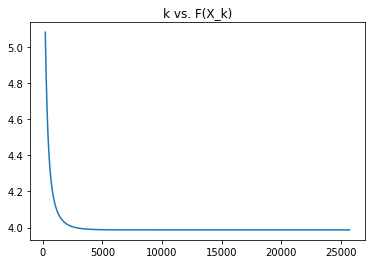

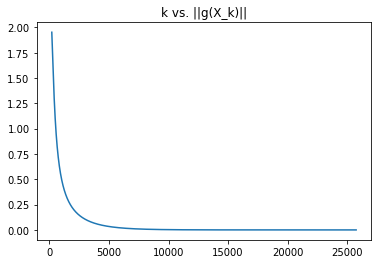

iterations:  25753
local minimum approximation:  [-0.9932861   0.99665107  0.99833032  0.99916774  0.9995852   0.99979328
  0.99989698  0.99994866  0.99997441  0.99998725  0.99999365  0.99999683
  0.99999842  0.99999921  0.99999961  0.9999998   0.9999999   0.99999995
  0.99999998  0.99999999  0.99999999  1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1. 

In [12]:
#Case n=100----------------------------------
n=100
#Given X_0---------------------------------------
#Generate x_0
x_0=[]
x_0.append(-1.2)
for i in range(1,n-2):
    x_0.append(1)
x_0.append(-1.2)
x_0.append(1)
loc_min=Steepest_descent(alpha=0.001,x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,pr='True',tol_grad=10**(-6))
print("local minimum approximation: ",(loc_min))
print("f-Value: ",Rosembrok(loc_min))#Error

Initial approximation:  [ 1.88202617  1.2000786   1.48936899  2.1204466   1.933779    0.51136106
  1.47504421  0.9243214   0.94839057  1.20529925  1.07202179  1.72713675
  1.38051886  1.06083751  1.22193162  1.16683716  1.74703954  0.89742087
  1.15653385  0.57295213 -0.27649491  1.3268093   1.4322181   0.62891749
  2.13487731  0.27281716  1.02287926  0.90640807  1.76638961  1.73467938
  1.07747371  1.18908126  0.55610713  0.00960177  0.82604393  1.07817448
  1.61514534  1.60118992  0.80633659  0.84884862  0.47572352  0.28999103
  0.1468649   1.9753877   0.74517391  0.78096285  0.37360232  1.38874518
  0.19305108  0.89362986  0.55226672  1.19345125  0.74459743  0.40968391
  0.98590889  1.21416594  1.03325861  1.15123595  0.68283895  0.81862942
  0.66376978  0.82022342  0.59342686  0.1368587   1.08871307  0.79910953
  0.18490083  1.23139113  0.54635082  1.0259727   1.36454528  1.06449146
  1.56970034  0.38258709  1.20117082  0.65759495  0.56460143  0.71057517
  0.84422373  1.02808267  0

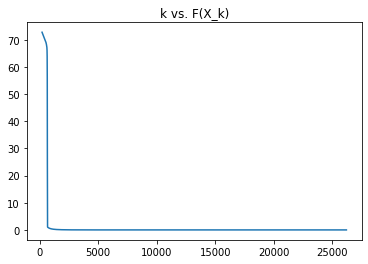

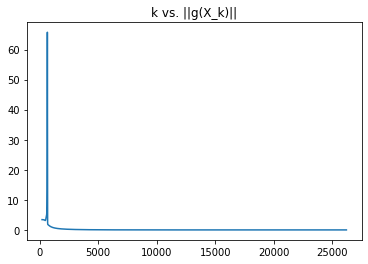

iterations:  26206
local minimum approximation:  [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99999999 0.99999999 0.99999997 0.99999995 0.99999989

In [19]:
#Random X_0---------------------------------------
n=100
np.random.seed(0)
x_0=np.random.normal(1,0.5,size=n)#Close to the minimum, with variance small
loc_min=Steepest_descent(alpha=0.001,x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,pr='True',tol_grad=10**(-6))
print("local minimum approximation: ",(loc_min))
print("f-Value: ",Rosembrok(loc_min))

In [24]:
def Newton(x_0,f,grad_f,Hess_f,tol_grad=10**(-6),pr='False',max_iter=10**5):
    d=np.linalg.solve(Hess_f(x_0),-np.array(grad_f(x_0)))
    x_1=x_0+d
    if(pr=='True'):
        print("Initial approximation: ", x_0)
        F=[f(x_0)]
        G=[np.linalg.norm(grad_f(x_0))]
    x_0=x_1
    k=1
    while(np.linalg.norm(grad_f(x_0))>tol_grad):
        k+=1
        d=np.linalg.solve(Hess_f(x_0),-np.array(grad_f(x_0)))
        x_1=x_0+d
        x_0=x_1
        if(pr=='True'):
            F.append(f(x_0))
            G.append(np.linalg.norm(grad_f(x_0)))
    if(k==max_iter):
        print("There wasnt convergence after "+str(max_iter)+" iterations.\nLast iteration: "+str(x_1))
    else:
        if(pr=='True'):
            if(len(F)>1000):
                L=200
            else:
                L=0
            plt.plot(range(L+1,len(F)),F[L:-1])
            #Posterior convergence
            #Ploteo los ultimos para ver qué forma tiene la curva en las ultimas iteraciones, pues inicia decreciendo muy rápido.
            plt.title("k vs. F(X_k)")   
            plt.show()         
            plt.plot(range(L+1,len(G)),G[L:-1])
            plt.title("k vs. ||g(X_k)||")   
            plt.show()         
        print("iterations: ",k)
        return (x_1)

In [ ]:
#Exercise 2. Rosembrok's function with Newton's algorithm.-------------------

Initial approximation:  [-1.2, 1]


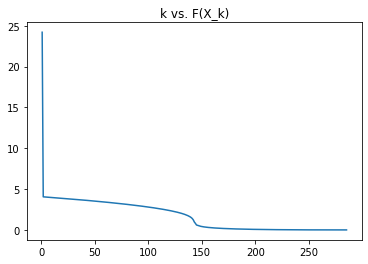

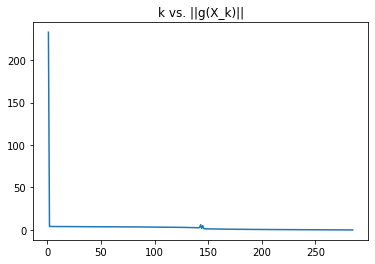

iterations:  286
local minimum approximation:  [1. 1.]
f-Value:  5.363586112503317e-19
Initial approximation:  [-1.1764052345967664, 1]


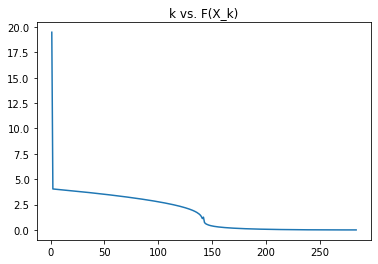

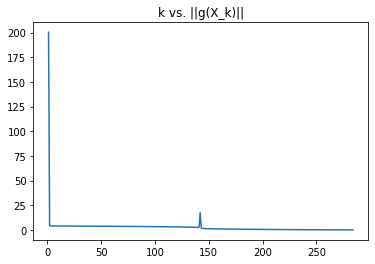

iterations:  285
local minimum approximation:  [1. 1.]
f-Value:  2.007213554215105e-18
Initial approximation:  [-1.2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1.2, 1]


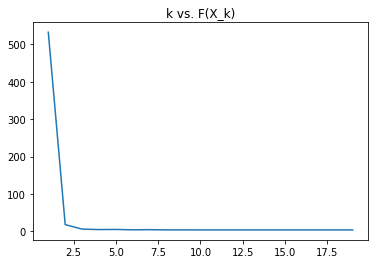

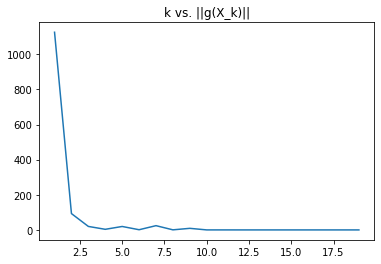

iterations:  20
local minimum approximation:  [-0.9932861   0.99665108  0.99833032  0.99916774  0.9995852   0.99979328
  0.99989698  0.99994866  0.99997441  0.99998725  0.99999365  0.99999683
  0.99999842  0.99999921  0.99999961  0.9999998   0.9999999   0.99999995
  0.99999998  0.99999999  0.99999999  1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.    

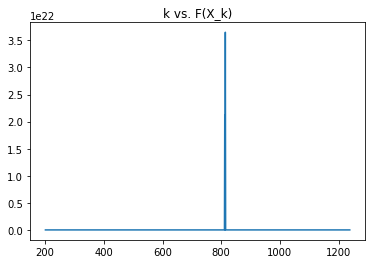

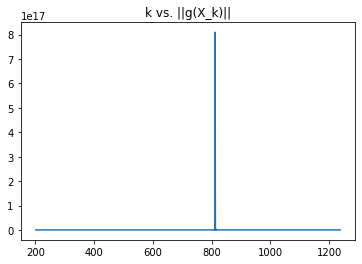

iterations:  1239
local minimum approximation:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
f-Value:  1.3578628192698333e-21


In [32]:
#n=2
#Given X_0---------------------------------------
x_0=[-1.2,1]
loc_min=Newton(x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,Hess_f=Rosembrok_Hessian,pr='True',tol_grad=10**(-6))
print("local minimum approximation: ",(loc_min))
print("f-Value: ",Rosembrok(loc_min))
#Random X_0---------------------------------------por qué tarda tanto?
np.random.seed(0)
x_0= [-np.random.normal(1,.1),1]#Para que tarde menos.
loc_min=Newton(x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,Hess_f=Rosembrok_Hessian,pr='True',tol_grad=10**(-6),max_iter=10)
print("local minimum approximation: ",(loc_min))
print("f-Value: ",Rosembrok(loc_min))
#n=100
#Given X_0---------------------------------------
n=100
x_0=[]
x_0.append(-1.2)
for i in range(1,n-2):
    x_0.append(1)
x_0.append(-1.2)
x_0.append(1)
loc_min=Newton(x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,Hess_f=Rosembrok_Hessian,pr='True',tol_grad=10**(-6),max_iter=10)
print("local minimum approximation: ",(loc_min))
print("f-Value: ",Rosembrok(loc_min))
#Random X_0---------------------------------------
np.random.seed(0)
x_0=np.random.normal(1,0.5,size=100)
loc_min=Newton(x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,Hess_f=Rosembrok_Hessian,pr='True',tol_grad=10**(-6))
print("local minimum approximation: ",(loc_min))
print("f-Value: ",Rosembrok(loc_min))

In [ ]:
#Exercise 2. Wood's function.---------------------------------------------

In [20]:
def Wood(X):
    return (100*(X[0]**2-X[1])**2+(X[0]-1)**2+(X[2]-1)**2+90*(X[2]**2-X[3])**2+10.1*((X[1]-1)**2+(X[3]-1)**2)+19.8*(X[1]-1)*(X[3]-1))
def Wood_grad(X):
    G=[]
    G.append(400*X[0]*(X[0]**2-X[1])+2*(X[0]-1))
    G.append(-200*(X[0]**2-X[1])+20.2*(X[1]-1)+19.8*(X[3]-1))
    G.append(2*(X[2]-1)+360*(X[2]**2-X[3])*X[2])
    G.append(-180*(X[2]**2-X[3])+20.2*(X[3]-1)+19.8*(X[1]-1))
    return G
def Wood_Hessian(X):
    D1=[2+400*(X[0]**2-1)+800*X[0]**2,-400*X[0],0,0]
    D2=[-400*X[0],220.2,0,19.8]
    D3=[0,0,2+720*(X[2]**2)+360*(X[2]-X[3]),-360*X[2]]
    D4=[0,19.8,-360*X[2],200.2]
    return [D1,D2,D3,D4]


In [21]:
#Second attemp. There is not convergence to [1,1,1,1]
print("local minimum approximation: ",Steepest_descent(alpha=0.00001,x_0=[-3,-1,-3,-1],f=Wood,grad_f=Wood_grad,pr='True',max_iter=100000,))

Initial approximation:  [-3, -1, -3, -1]
There wasnt convergence after 100000 iterations.
Last iteration: [-0.96889398  0.94891635 -0.96859671  0.9494705 ]
local minimum approximation:  None


Initial approximation:  [1.88202617 1.2000786  1.48936899 2.1204466 ]


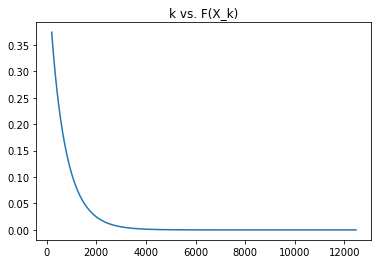

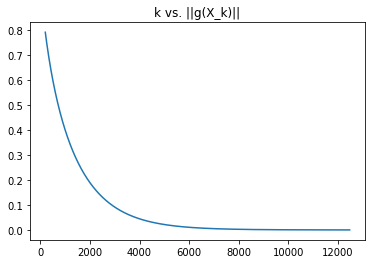

iterations:  12471
local minimum approximation:  [0.99995611 0.99991208 1.00004388 1.00008792]
f-Value:  6.948228755169045e-09


In [ ]:
np.random.seed(0)
x_0=np.random.normal(1,0.5,size=4)
loc_min=Steepest_descent(alpha=0.001,x_0=x_0,f=Wood,grad_f=Wood_grad,pr='True',max_iter=100000,)
print("local minimum approximation: ",loc_min)
print("f-Value: ",Wood(loc_min))

Initial approximation:  [-3, -1, -3, -1]


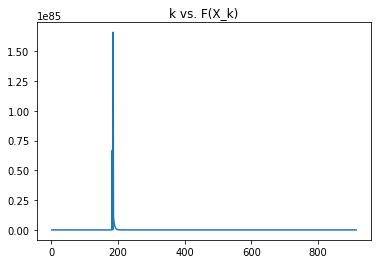

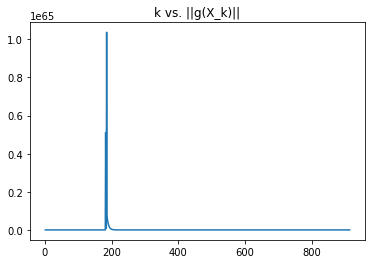

iterations:  915
local minimum approximation:  [1. 1. 1. 1.]
f-Value:  2.278965258300741e-20
Initial approximation:  [1.88202617 1.2000786  1.48936899 2.1204466 ]


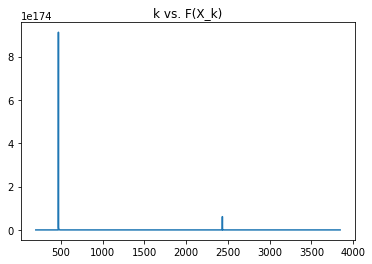

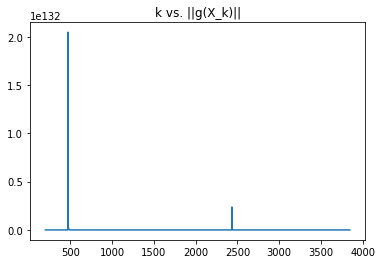

iterations:  3846
local minimum approximation:  [1. 1. 1. 1.]
f-Value:  3.3071320058463095e-18


In [33]:
#Exercise 2. Wood's function with Newton's algorithm
x_0=[-3,-1,-3,-1]
loc_min=Newton(x_0=x_0,f=Wood,grad_f=Wood_grad,Hess_f=Wood_Hessian, pr='True',)
print("local minimum approximation: ",loc_min)
print("f-Value: ",Wood(loc_min))
np.random.seed(0)
x_0=np.random.normal(1,0.5,size=4)
loc_min=Newton(x_0=x_0,f=Wood,grad_f=Wood_grad,Hess_f=Wood_Hessian, pr='True',)
print("local minimum approximation: ",loc_min)
print("f-Value: ",Wood(loc_min))

In [ ]:
#Exercise 3.----------------------------------------

When $\lambda=$ 1
Initial approximation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


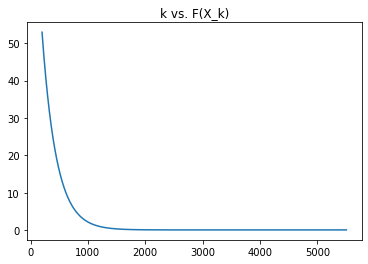

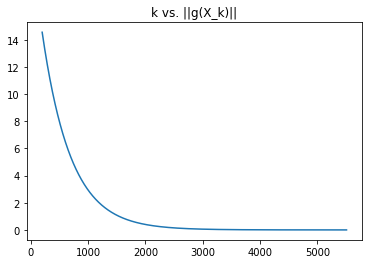

iterations:  5509


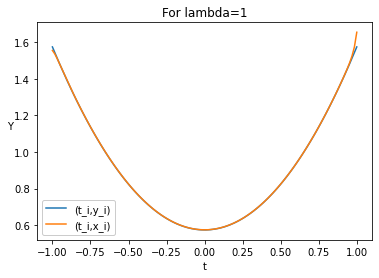

When $\lambda=$ 10
Initial approximation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


KeyboardInterrupt: ignored

In [94]:
np.random.seed(0)
for l in [1,10,100]:
    s=np.random.uniform(0.5,1)#Random variance
    print("When $\lambda=$", l, )
    etha=np.random.normal(0,s)
    t=np.linspace(-1,1,128)
    Y=t**2+etha
    def f_normal(X,l=l,Y=Y):
        A=np.sum((X-Y)**2)
        B=np.sum(l*(X[1:-1]-X[0:-2])**2)
        suma=A+B
        return suma
    def f_normal_grad(X,l=l,Y=Y):
        D=[]
        D.append(2*(X[0]-Y[0])-2*l*(X[1]-X[0]))
        for i in range(1,len(X)-1):
            D.append(2*(X[i]-Y[i])-2*l*(X[i+1]-X[i])+2*l*(X[i]-X[i-1]))
        D.append(2*(X[-1]-Y[-1])-2*l*(X[-1]-X[-2]))
        return D
    #Ya estan definidas las funciones para l,Y fijos.
    
   
    x=Steepest_descent(alpha=0.001,x_0=np.zeros(128),f=f_normal,grad_f=f_normal_grad,tol_grad=10**(-3),max_iter=10**5,pr='True')
    plt.plot(t,Y,label='(t_i,y_i)')
    plt.title('For lambda='+str(l))
    plt.xlabel('t')
    plt.ylabel('Y',rotation=0)
    plt.plot(t,x,label='(t_i,x_i)')
    plt.legend(framealpha=1, frameon=True);
    plt.show()


In [60]:
f_normal(np.zeros(128))

118.40473353322545

In [57]:
def f_normal(X,l=l,Y=Y):
        A=np.sum((X-Y)**2)
        B=np.sum(l*(X[1:-1]-X[0:-2])**2)
        suma=A+B
        return suma

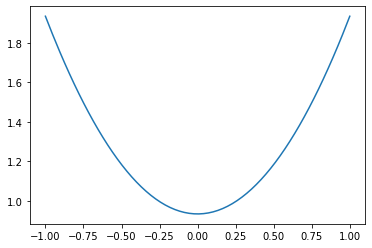

Initial approximation:  [ 1.88202617  1.2000786   1.48936899  2.1204466   1.933779    0.51136106
  1.47504421  0.9243214   0.94839057  1.20529925  1.07202179  1.72713675
  1.38051886  1.06083751  1.22193162  1.16683716  1.74703954  0.89742087
  1.15653385  0.57295213 -0.27649491  1.3268093   1.4322181   0.62891749
  2.13487731  0.27281716  1.02287926  0.90640807  1.76638961  1.73467938
  1.07747371  1.18908126  0.55610713  0.00960177  0.82604393  1.07817448
  1.61514534  1.60118992  0.80633659  0.84884862  0.47572352  0.28999103
  0.1468649   1.9753877   0.74517391  0.78096285  0.37360232  1.38874518
  0.19305108  0.89362986  0.55226672  1.19345125  0.74459743  0.40968391
  0.98590889  1.21416594  1.03325861  1.15123595  0.68283895  0.81862942
  0.66376978  0.82022342  0.59342686  0.1368587   1.08871307  0.79910953
  0.18490083  1.23139113  0.54635082  1.0259727   1.36454528  1.06449146
  1.56970034  0.38258709  1.20117082  0.65759495  0.56460143  0.71057517
  0.84422373  1.02808267  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_laun

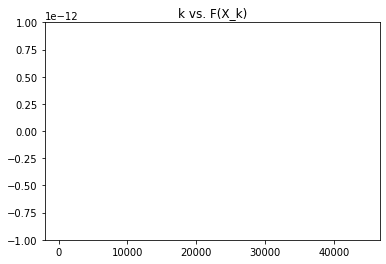

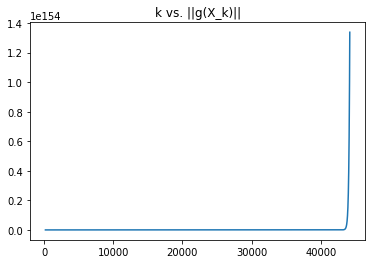

iterations:  88731
local minimum approximation:  [1.61032742e+269 2.41549113e+269 4.42840041e+269 8.65550988e+269
 1.72103743e+270 3.43704259e+270 6.87156904e+270 1.37418800e+271
 2.74831310e+271 5.49659475e+271 1.09931738e+272 2.19863397e+272
 4.39726754e+272 8.79453488e+272 1.75890697e+273 3.51781393e+273
 7.03562786e+273 1.40712557e+274 2.81425114e+274 5.62850228e+274
 1.12570046e+275 2.25140091e+275 4.50280183e+275 9.00560365e+275
 1.80112073e+276 3.60224146e+276 7.20448292e+276 1.44089658e+277
 2.88179317e+277 5.76358634e+277 1.15271727e+278 2.30543454e+278
 4.61086907e+278 9.22173814e+278 1.84434763e+279 3.68869526e+279
 7.37739051e+279 1.47547810e+280 2.95095621e+280 5.90191241e+280
 1.18038248e+281 2.36076496e+281 4.72152993e+281 9.44305986e+281
 1.88861197e+282 3.77722394e+282 7.55444789e+282 1.51088958e+283
 3.02177915e+283 6.04355831e+283 1.20871166e+284 2.41742332e+284
 4.83484665e+284 9.66969329e+284 1.93393866e+285 3.86787732e+285
 7.73575463e+285 1.54715093e+286 3.094301

In [88]:
np.random.seed(0)
x_0=np.random.normal(1,0.5,size=128)
loc_min=Steepest_descent(alpha=0.001,x_0=x_0,f=f_normal,grad_f=f_normal_grad,pr='True')
print("local minimum approximation: ",loc_min)
print("f-Value: ",f_normal(loc_min))